In [33]:
%matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np

import xarray as xr
import xesmf as xe

import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import cartopy.feature as cfeat

import sys
sys.path.append('../')
import utils
import plotting

np.seterr(invalid='ignore'); # disable a warning from matplotlib and cartopy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
ds_normal = xr.open_mfdataset('/net/fs11/d0/emfreese/GCrundirs/nuclearproj/normal_NA/OutputDir/GEOSChem.SpeciesConc.201603*.nc4')


In [77]:
ds_global = xr.open_mfdataset('/net/fs11/d0/emfreese/GCrundirs/nuclearproj/normal_bc/OutputDir/GEOSChem.SpeciesConc.20160301_0000z.nc4')

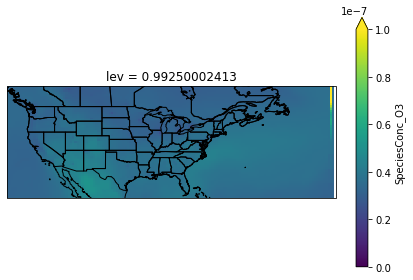

In [78]:
fig, ax =  plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()})
    
#make the plot
ds_normal['SpeciesConc_O3'].isel(lev = 0).mean(dim = 'time').plot(ax=ax, #set the axis
vmin = 0, vmax = 1e-7,#extend=extension,#extend the colorbar in both directions
transform=ccrs.PlateCarree()) #fit data into map) #choose color for our colorbar

ax.add_feature(cfeat.STATES)
ax.coastlines() #add coastlines
ax.set_extent([-130.0, -40.0, 24.0, 45.0]) #set a limit on the plot lat and lon
plt.tight_layout()

In [79]:
#create regridder (reusing weights)
regridder = xe.Regridder(ds_normal, ds_global, 'conservative')
regridder  # print basic regridder information.

#regrid according to our ds_out grid
regrid_ds = regridder(ds_normal)

regrid_ds #look at our regridded dataset

/home/emfreese/anaconda3/envs/grid_mod/lib/python3.9/site-packages/xesmf/backend.py:53: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')
/home/emfreese/anaconda3/envs/grid_mod/lib/python3.9/site-packages/xesmf/frontend.py:496: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


<xarray.Dataset>
Dimensions:               (ilev: 48, lat: 46, lev: 47, lon: 72, time: 31)
Coordinates:
  * time                  (time) datetime64[ns] 2016-03-01T12:00:00 ... 2016-...
  * lev                   (lev) float64 0.9925 0.9775 ... 0.0001387 3.8e-05
  * ilev                  (ilev) float64 1.0 0.985 0.97 ... 6.6e-05 1e-05
  * lon                   (lon) float64 -180.0 -175.0 -170.0 ... 170.0 175.0
  * lat                   (lat) float64 -89.0 -86.0 -82.0 ... 82.0 86.0 89.0
Data variables: (12/290)
    AREA                  (time, lat, lon) float64 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    SpeciesConc_RCOOH     (time, lev, lat, lon) float64 dask.array<chunksize=(1, 47, 46, 72), meta=np.ndarray>
    SpeciesConc_O2        (time, lev, lat, lon) float64 dask.array<chunksize=(1, 47, 46, 72), meta=np.ndarray>
    SpeciesConc_N2        (time, lev, lat, lon) float64 dask.array<chunksize=(1, 47, 46, 72), meta=np.ndarray>
    SpeciesConc_H2        (time, lev, lat, lon) float64 dask.array<chunksize=(1, 47, 46, 72), meta=np.ndarray>
    SpeciesConc_O         (time, lev, lat, lon) float64 dask.array<chunksize=(1, 47, 46, 72), meta=np.ndarray>
    ...                    ...
    SpeciesConc_ATOOH     (time, lev, lat, lon) float64 dask.array<chunksize=(1, 47, 46, 72), meta=np.ndarray>
    SpeciesConc_ALK4      (time, lev, lat, lon) float64 dask.array<chunksize=(1, 47, 46, 72), meta=np.ndarray>
    SpeciesConc_ALD2      (time, lev, lat, lon) float64 dask.array<chunksize=(1, 47, 46, 72), meta=np.ndarray>
    SpeciesConc_AERI      (time, lev, lat, lon) float64 dask.array<chunksize=(1, 47, 46, 72), meta=np.ndarray>
    SpeciesConc_ACTA      (time, lev, lat, lon) float64 dask.array<chunksize=(1, 47, 46, 72), meta=np.ndarray>
    SpeciesConc_ACET      (time, lev, lat, lon) float64 dask.array<chunksize=(1, 47, 46, 72), meta=np.ndarray>
Attributes:
    regrid_method:  conservative

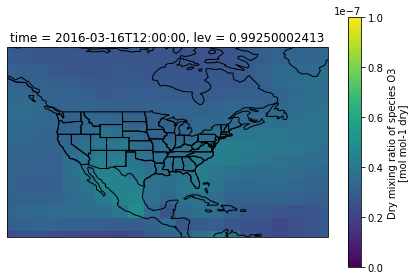

In [80]:
fig, ax =  plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()})
    
#make the plot
ds_global['SpeciesConc_O3'].isel(lev = 0).plot(ax=ax, #set the axis
vmin = 0, vmax = 1e-7, #set the levels for our colorbars
#extend=extension,#extend the colorbar in both directions
transform=ccrs.PlateCarree()) #fit data into map) #choose color for our colorbar

ax.add_feature(cfeat.STATES)
ax.coastlines() #add coastlines
ax.set_extent([-140.0, -40.0, 10.0, 60.0]) #set a limit on the plot lat and lon
plt.tight_layout()

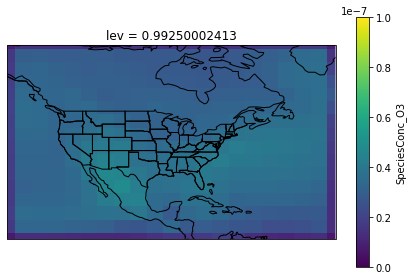

In [81]:
fig, ax =  plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()})
    
#make the plot
(regrid_ds['SpeciesConc_O3'].isel(lev = 0).mean(dim = 'time')).plot(ax=ax, #set the axis
vmin = 0, vmax = 1e-7,#extend=extension,#extend the colorbar in both directions
transform=ccrs.PlateCarree()) #fit data into map) #choose color for our colorbar

ax.add_feature(cfeat.STATES)
ax.coastlines() #add coastlines
ax.set_extent([-140.0, -40.0, 10.0, 60.0]) #set a limit on the plot lat and lon
plt.tight_layout()

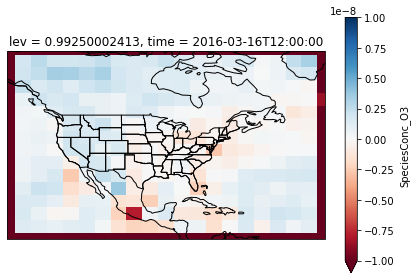

In [82]:
fig, ax =  plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()})
    
#make the plot
(regrid_ds['SpeciesConc_O3'].isel(lev = 0).mean(dim = 'time') - ds_global['SpeciesConc_O3'].isel(lev = 0) ).plot(ax=ax, #set the axis
vmin = -1e-8, vmax = 1e-8,#extend=extension,#extend the colorbar in both directions
transform=ccrs.PlateCarree(), cmap = "RdBu") #fit data into map) #choose color for our colorbar

ax.add_feature(cfeat.STATES)
ax.coastlines() #add coastlines
ax.set_extent([-140.0, -40.0, 10.0, 60.0]) #set a limit on the plot lat and lon
plt.tight_layout()